In [1]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [2]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


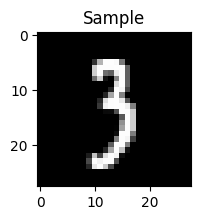

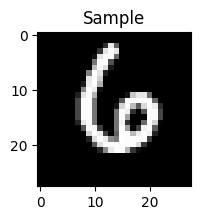

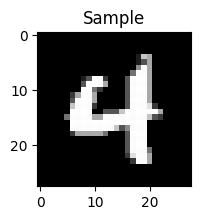

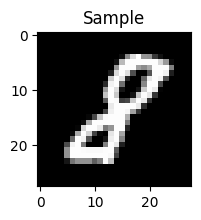

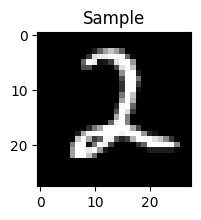

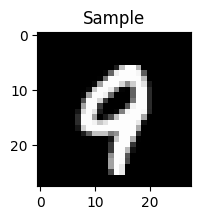

In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")


# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

In [4]:
img_rows=x_train[0].shape[0]
img_col=x_train[0].shape[1]

x_train=x_train.reshape(x_train.shape[0],img_rows,img_col,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_col,1)

input_shape=(img_rows,img_col,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0



print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test=to_categorical(y_test)

print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
______________________________________________

In [9]:
batch_size = 128
epochs = 25

history=model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss:',score[0])
print('Test accuracy:',score[1])


Epoch 1/25
469/469 [==============================] - 17s 20ms/step - loss: 2.2046 - accuracy: 0.3861 - val_loss: 2.0483 - val_accuracy: 0.6030
Epoch 2/25
469/469 [==============================] - 8s 17ms/step - loss: 1.5862 - accuracy: 0.7103 - val_loss: 0.9615 - val_accuracy: 0.8080
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.6840 - accuracy: 0.8339 - val_loss: 0.4898 - val_accuracy: 0.8738
Epoch 4/25
469/469 [==============================] - 7s 14ms/step - loss: 0.4504 - accuracy: 0.8771 - val_loss: 0.3843 - val_accuracy: 0.8955
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3789 - accuracy: 0.8933 - val_loss: 0.3394 - val_accuracy: 0.9039
Epoch 6/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3431 - accuracy: 0.9019 - val_loss: 0.3128 - val_accuracy: 0.9118
Epoch 7/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3199 - accuracy: 0.9079 - val_loss: 0.2939 - val_accuracy: 0.917

In [10]:
history_dict=history.history
history_dict

{'loss': [2.2045581340789795,
  1.5861790180206299,
  0.6840076446533203,
  0.45038753747940063,
  0.37887632846832275,
  0.34308215975761414,
  0.31994393467903137,
  0.3025323152542114,
  0.2883843183517456,
  0.2763511538505554,
  0.26543566584587097,
  0.2557459771633148,
  0.24634069204330444,
  0.23735301196575165,
  0.22907593846321106,
  0.2215597927570343,
  0.21458037197589874,
  0.20783676207065582,
  0.20145541429519653,
  0.1954232156276703,
  0.18980520963668823,
  0.1846718043088913,
  0.17964382469654083,
  0.17494919896125793,
  0.17059077322483063],
 'accuracy': [0.3861333429813385,
  0.7103000283241272,
  0.8338833451271057,
  0.8770833611488342,
  0.8932666778564453,
  0.9019166827201843,
  0.9078500270843506,
  0.9133166670799255,
  0.9168166518211365,
  0.9205166697502136,
  0.9231666922569275,
  0.9263833165168762,
  0.928683340549469,
  0.9317166805267334,
  0.9340500235557556,
  0.9364500045776367,
  0.9386166930198669,
  0.9400166869163513,
  0.942116677761077

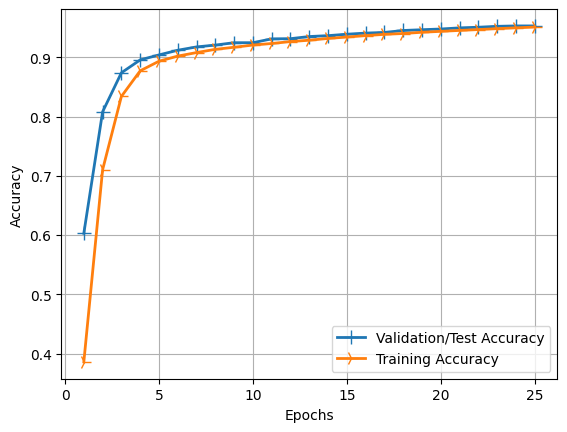

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
import tensorflow
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

from tensorflow.keras.models import load_model

classifier = tensorflow.keras.models.load_model('mnist_simple_cnn_10_Epochs.h5')

Model Saved


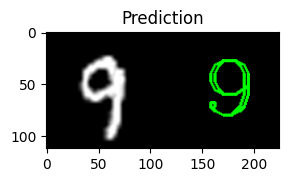

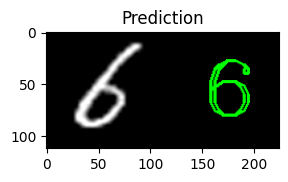

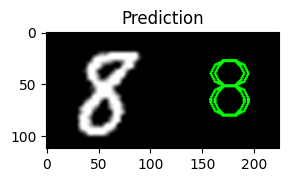

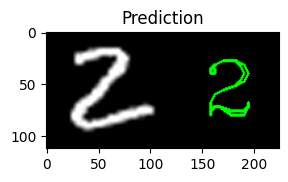

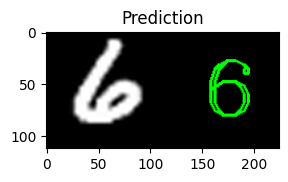

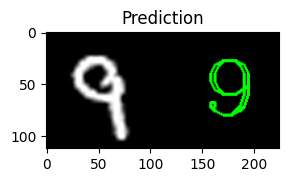

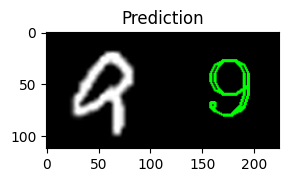

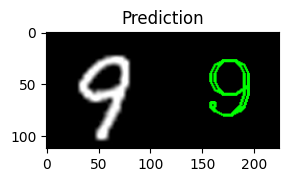

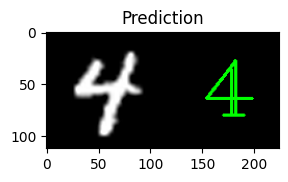

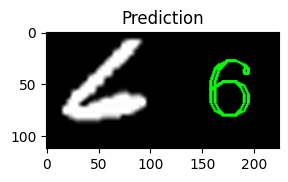

In [23]:
import cv2
import numpy as np

# Reload our data since we rescaled it
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    '''Function that places the predicted class next to the original image'''
    # Create our black background
    BLACK = [0,0,0]
    # Expanded our original image to the right to create space to place our predicted class text
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # convert our grayscale image to color
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Put our predicted class text in our expanded image
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    # Get a random data image from our test dataset 
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    # Create a larger re-sized image to hold our text and allow for a larger display
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reshape our data so that we can input it (forward propagate) it to our network
    input_im = input_im.reshape(1,28,28,1) 
    
    # Get Prediction, use [0] to access the value in the numpy array since it's stored as an array
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # Put the label on the image of our test data sample
    draw_test("Prediction", res,  np.uint8(imageL)) 